The following code is from
[Link](https://github.com/justinbois/rdsolver/blob/master/notebooks/asdm_example.ipynb)

In [1]:
import numpy as np
import numba
import scipy.integrate
from matplotlib import pyplot as plt

%config Completer.use_jedi = False
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append("/end/home/rh2310/morpho_repo/turing_codebase")
from solvers.explicit_Euler import integrate
from solvers.turing_models import Koch_Meinhardt

import rdsolver

In [2]:


n = (128, 128)
L = (0.05, 0.05)

Ds = np.array([0.0025, 0.2])
 
sigma_u=0.0000013709
sigma_v=8.3639623771
mu_u=1.1747487351
rho_u=0.1271707249
rho_v=0.1457174021
kappa_u=0#0.0032018738

f_args = (sigma_u, sigma_v, rho_u, rho_v, kappa_u, mu_u)

with open('../turing_Brusselator.npy', 'rb') as file:
    data = np.load(file)

data = data[..., -4:]
c0 = data[:,:,:, 0]
c0 = rdsolver.viz.interpolate_concs(c0[..., np.newaxis], n_interp_points=n)[...,0]

t = np.linspace(0, 100, 101)

dt = 0.0001

sol = integrate(c0, t, dt, n, L, Ds, Koch_Meinhardt, f_args)

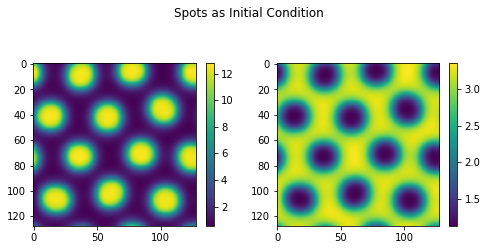

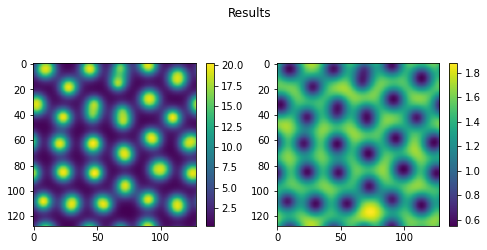

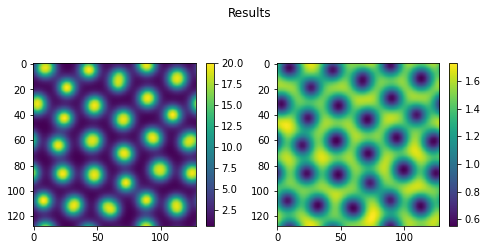

In [4]:
_ = plt.figure(figsize=(8,4))
plt.suptitle("Spots as Initial Condition")
plt.subplot(121)
plt.imshow(c0[0,:,:])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(c0[1,:,:])
plt.colorbar(shrink=.75)
plt.show()

index = -40
_ = plt.figure(figsize=(8,4))
plt.suptitle("Results")
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()


index = -1
_ = plt.figure(figsize=(8,4))
plt.suptitle("Results")
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

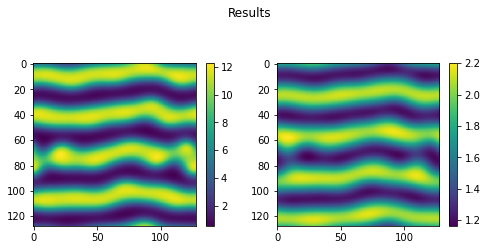

In [69]:
index = -20
_ = plt.figure(figsize=(8,4))
plt.suptitle("Results")
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

In [40]:
n = (128, 128)
L = (0.1, 0.1)

Ds = np.array([0.0025, 0.2])
 
sigma_u=0.0000013709
sigma_v=8.3639623771
mu_u=1.1747487351
rho_u=0.1271707249
rho_v=0.1457174021
kappa_u=0.0032018738

f_args = (sigma_u, sigma_v, rho_u, rho_v, kappa_u, mu_u)

with open('../turing_Brusselator.npy', 'rb') as file:
    data = np.load(file)

data = data[..., -4:]
c0 = data[:,:,:, 0]
c0 = rdsolver.viz.interpolate_concs(c0[..., np.newaxis], n_interp_points=n)[...,0]

t = np.linspace(0, 100, 101)

dt = 0.001

sol = integrate(c0, t, dt, n, L, Ds, Koch_Meinhardt, f_args)

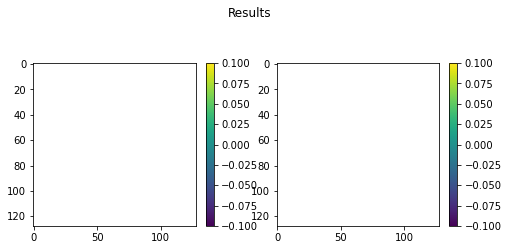

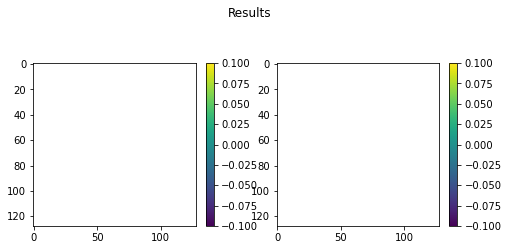

In [39]:
index = -50
_ = plt.figure(figsize=(8,4))
plt.suptitle("Results")
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()


index = -1
_ = plt.figure(figsize=(8,4))
plt.suptitle("Results")
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

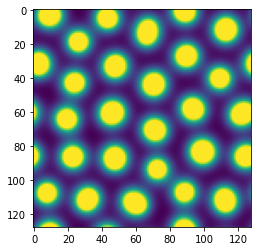

In [5]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()

im = im=plt.imshow(sol[0, :,:,0])#  ,interpolation='none')
def init():
    im.set_data(sol[0, :,:,0])
    return [im]
    
def animate(i):    
    a=im.get_array()
    a=sol[0, :,:,i] 
    im.set_array(sol[0, :,:,i] )
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=50, blit=True)


anim.save('turring_weird4.gif', writer='imagemagick')